# Análise simples dos Tweets Coletados

In [18]:
import nltk
nltk.download('stopwords')


import pandas as pd
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/franciscofoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# String: #Biblioteconomia

In [50]:
caminho = '/home/franciscofoz/Documents/GitHub/python-training/12 - Pacotes Python/tweepy/tweets_csv/tweets_#Biblioteconomia_20230527.csv'

tweets_biblioteconomia = pd.read_csv(caminho)
tweets_biblioteconomia

,username,username_name,date_brasilia,hora_brasilia,tweet_id,tweet_text,date_GMT,hora_GMT
0,@BoasPraticasBCI,Observatório de Boas Práticas BCI,2023-05-26,20:09:05,1662234431086551041,A inteligência artificial contribuindo com a d...,2023-05-26,23:09:05
1,@ETD_estudio,Estudio de Técnicas Documentales - ETD,2023-05-26,06:52:05,1662033858412388354,RT @ETD_estudio: CATÁLOGO DE #MÁSTERS ETD. \n\...,2023-05-26,09:52:05
2,@ETD_estudio,Estudio de Técnicas Documentales - ETD,2023-05-26,06:52:01,1662033842171944970,RT @ETD_estudio: CATÁLOGO DE #MÁSTERS ETD\n\n1...,2023-05-26,09:52:01
3,@BoasPraticasBCI,Observatório de Boas Práticas BCI,2023-05-25,21:11:23,1661887719176384513,Agricultura sustentável e popular 🌱🤩\nVisite n...,2023-05-26,00:11:23
4,@sibiufc,Sistema de Bibliotecas da UFC,2023-05-25,07:58:50,1661688267496980481,Sabia que o Sistema de Bibliotecas elabora e d...,2023-05-25,10:58:50
5,@diegoleonardopa,Diego Leonardo 🇧🇷,2023-05-24,21:05:29,1661523847114379266,RT @SIBI_UFRJ: No site do #SiBIUFRJ tem uma re...,2023-05-25,00:05:29
6,@FozFrancisco,Francisco Foz,2023-05-24,15:10:04,1661434403900334080,"""Não é exagero afirmar que Henriette Avram sal...",2023-05-24,18:10:04
7,@SIBI_UFRJ,SiBI UFRJ,2023-05-24,11:35:04,1661380298943217666,No site do #SiBIUFRJ tem uma relação de e-book...,2023-05-24,14:35:04
8,@123archiv,¿?,2023-05-24,09:20:38,1661346464604344321,¿Alguien conoce de la existencia de grupos de ...,2023-05-24,12:20:38
9,@bibliotecaippur,BIBLIOTECA DO IPPUR/UFRJ,2023-05-23,21:29:44,1661167562015617025,RT @SIBI_UFRJ: O Censo da #Biblioteconomia Bra...,2023-05-24,00:29:44


In [51]:
tweets_biblioteconomia.username.value_counts().head(10)

username
@FozFrancisco       5
@ETD_estudio        3
@BoasPraticasBCI    2
@SIBI_UFRJ          2
@bibliotecaippur    2
@Mundaneumasbl      1
@pedroisandretta    1
@lucas_g_wendt      1
@normalizada        1
@UDivulga           1
Name: count, dtype: int64

In [52]:
tweets_biblioteconomia.date_brasilia.value_counts()

date_brasilia
2023-05-22    9
2023-05-23    5
2023-05-21    5
2023-05-24    4
2023-05-26    3
2023-05-25    2
Name: count, dtype: int64

In [53]:
tweets_biblioteconomia.tweet_text = tweets_biblioteconomia.tweet_text.str.lower()
palavras_tweets = []
for tweet in tweets_biblioteconomia['tweet_text']:
    palavras_tweets.extend(tweet.split())

palavras_tweets

['a',
 'inteligência',
 'artificial',
 'contribuindo',
 'com',
 'a',
 'democratização',
 'da',
 'leitura!',
 '📚✨',
 'visite',
 'nosso',
 'site',
 'para',
 'saber',
 'mais:',
 '🔗https://t.co/odmqbmeiqf',
 '#boaspraticasbci',
 '#biblioteconomia',
 '#projetodeextensaoufrn',
 '#librarianship',
 'https://t.co/px4zknv7pk',
 'rt',
 '@etd_estudio:',
 'catálogo',
 'de',
 '#másters',
 'etd.',
 '¡5%',
 'de',
 'descuento!',
 '-',
 'máster',
 'en',
 '#archivística',
 'https://t.co/5j9tsnj1nm',
 '-',
 'máster',
 'en',
 '#biblioteco…',
 'rt',
 '@etd_estudio:',
 'catálogo',
 'de',
 '#másters',
 'etd',
 '10%',
 'de',
 'descuento',
 'si',
 'te',
 'matriculas',
 'en',
 'mayo.',
 'máster',
 'en',
 '#archivística',
 'https://t.co/5j9tsnjzdk',
 'má…',
 'agricultura',
 'sustentável',
 'e',
 'popular',
 '🌱🤩',
 'visite',
 'nosso',
 'site',
 'para',
 'saber',
 'mais:',
 '🔗https://t.co/odmqbmeiqf',
 '#boaspraticasbci',
 '#biblioteconomia',
 '#projetodeextensaoufrn',
 '#librarianship',
 'https://t.co/wcgeyeokqx',

In [60]:
stop_words = stopwords.words('portuguese')
termos_excluidos = ['#biblioteconomia','-','la','el','tipo','biblioteconomia','na','pra','en','na', 'y','i']

stop_words.extend(termos_excluidos)

palavras_tweets_sem_stopwords = []

for palavra in palavras_tweets:
    if palavra not in stop_words:
        palavras_tweets_sem_stopwords.append(palavra)

In [61]:
frequencia_palavras = FreqDist(palavras_tweets_sem_stopwords)
sorted(dict(frequencia_palavras).items(), key=lambda x: x[1], reverse=True)

[('rt', 11),
 ('sobre', 6),
 ('site', 4),
 ('informação', 4),
 ('@fozfrancisco:', 4),
 ('\\0/', 4),
 ('competência', 4),
 ('@etd_estudio:', 3),
 ('máster', 3),
 ('biblioteca', 3),
 ('#biblioteconomía', 3),
 ('#entrevista', 3),
 ('ilídio', 3),
 ('lobato', 3),
 ('ernesto', 3),
 ('manhique', 3),
 ('pesquisa', 3),
 ('informacional', 3),
 ('graduandos', 3),
 ('“neste', 3),
 ('artigo', 3),
 ('encontra', 3),
 ('5', 3),
 ('indicações', 3),
 ('artigos', 3),
 ('científico', 3),
 ('frutos', 3),
 ('pesquisas', 3),
 ('dedicaram', 3),
 ('entender', 3),
 ('visite', 2),
 ('saber', 2),
 ('mais:', 2),
 ('🔗https://t.co/odmqbmeiqf', 2),
 ('#boaspraticasbci', 2),
 ('#projetodeextensaoufrn', 2),
 ('#librarianship', 2),
 ('catálogo', 2),
 ('#másters', 2),
 ('#archivística', 2),
 ('@sibi_ufrj:', 2),
 ('#sibiufrj', 2),
 ('relação', 2),
 ('e-books', 2),
 ('gratuitos', 2),
 ('abarcam', 2),
 ('temas', 2),
 ('relacionados', 2),
 ('áreas', 2),
 ('lista', 2),
 ('censo', 2),
 ('brasileira', 2),
 ('propósito', 2),
 ('

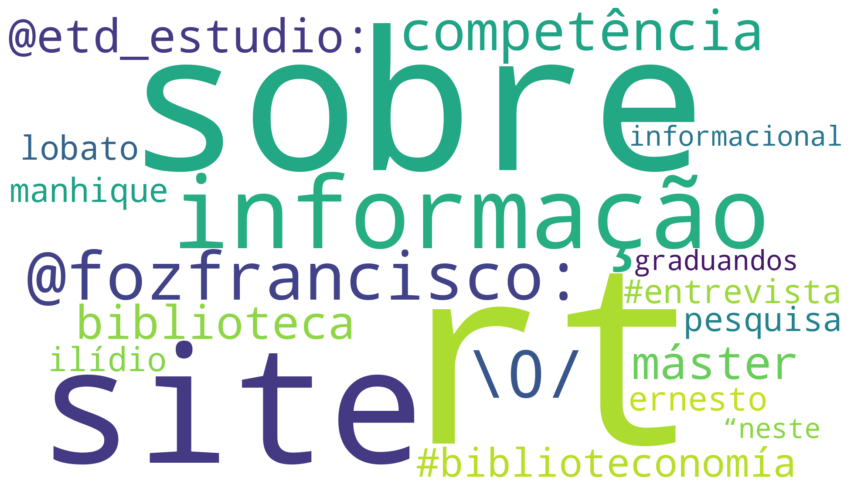

In [63]:
# Criar a nuvem de palavras
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="white",
                      width=1920,
                      height=1080,
                      max_words=20,
                      prefer_horizontal=1).generate_from_frequencies(frequencia_palavras)
frequencia_palavras

# Plotar a nuvem de palavras
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
